In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
sys.path.extend([str(Path.home() / "PycharmProjects/data_toolkit")])

from func import get_data, pd, path, path_img, show_image, show_images_horizontally
from func_torch import np, f1_score_cal
from nlp.string_matching.function import run_match

In [2]:
# input
df = get_data(path / 'train.csv', path_img)
df.head()

,posting_id,image,image_phash,title,label_group,filepath,target,title_edit
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_2278313361, train_129225211]",paper bag victoria secret
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_3386243561, train_3423213080]","double tape 3m vhb 12 mm x 4,5 m original / do..."
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_3803689425, train_2288590299]",maling tts canned pork luncheon meat 397 gr
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_3342059966, train_2406599165]",daster batik lengan pendek - motif acak / camp...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_921438619, train_3369186413]",nescafe \xc3\x89clair latte 220ml


In [3]:
item = df['title_edit'].unique().tolist()
target_check = df['target'].tolist()

# find thresholds
thresholds = list(np.arange(0.4, 1, 0.1))
scores, plot_check, f1_score_lst, pred_lst = {}, {}, [], {}
for thres in thresholds:
    num = round(thres, 1)
    
    # run
    match_df = run_match(base=item, source=item, top=10, similarity=num)
    match_df['rank'] = match_df.groupby(['base'])['source'].transform(lambda x: pd.factorize(x)[0]).add(1)
    match_df = match_df.merge(df[['posting_id', 'title_edit']], how='left', left_on='base', right_on='title_edit')
    match_df = match_df.merge(df[['posting_id', 'title_edit']], how='left', left_on='source', right_on='title_edit', suffixes=('_base', '_source'))

    pred = match_df.groupby('posting_id_base')['posting_id_source'].apply(set).apply(list).to_dict()
    pred_check = df['posting_id'].map(pred).tolist()
    f1_score_lst = [f1_score_cal(i, v) for i, v in zip(target_check, pred_check)]
    
    score = np.mean(f1_score_lst)
    scores.update({num: score})
    plot_check.update({num: f1_score_lst})
    pred_lst.update({num: pred_check})
    print(f'--- F1 score for threshold {num} is {score:.3f} ---\n')
    
# choose thresholds 
best_score = max(scores, key=scores.get)
print(f'--- Best score is {round(scores[best_score], 4)} and has a threshold {best_score} ---')
df['text_pred'] = pred_lst[best_score]
df['f1_score'] = plot_check[best_score]

process vectorize: 1.09s
process optimized: 1.78s
32,629 skus in BASE match 32,629 skus in SOURCE
--- F1 score for threshold 0.4 is 0.579 ---

process vectorize: 1.95s
process optimized: 3.34s
32,629 skus in BASE match 32,629 skus in SOURCE
--- F1 score for threshold 0.5 is 0.636 ---

process vectorize: 1.84s
process optimized: 2.95s
32,629 skus in BASE match 32,629 skus in SOURCE
--- F1 score for threshold 0.6 is 0.637 ---

process vectorize: 1.83s
process optimized: 3.05s
32,629 skus in BASE match 32,629 skus in SOURCE
--- F1 score for threshold 0.7 is 0.601 ---

process vectorize: 1.83s
process optimized: 2.69s
32,629 skus in BASE match 32,629 skus in SOURCE
--- F1 score for threshold 0.8 is 0.554 ---

process vectorize: 1.87s
process optimized: 2.75s
32,629 skus in BASE match 32,629 skus in SOURCE
--- F1 score for threshold 0.9 is 0.510 ---

--- Best score is 0.6365 and has a threshold 0.6 ---


Text(0, 0.5, '')

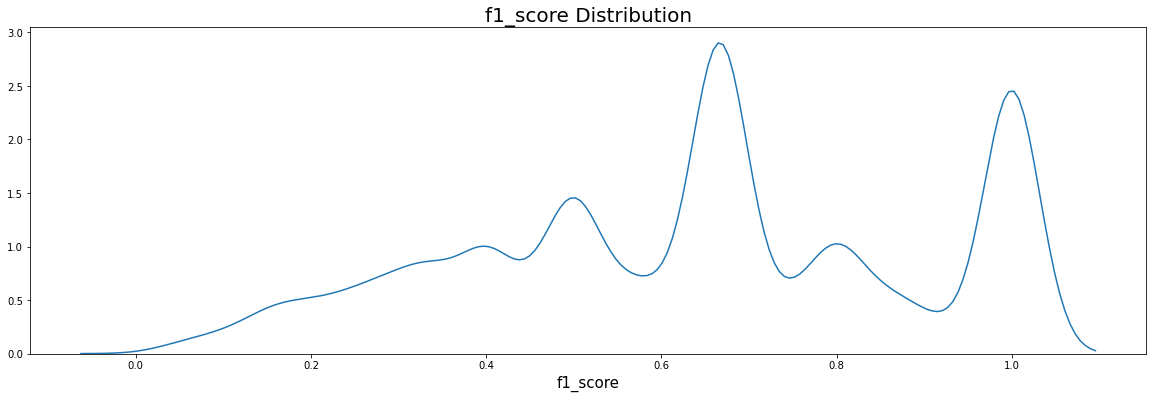

In [4]:
plt.figure(figsize=(20, 6))

plot = sns.kdeplot(x=df["f1_score"])
plt.title("f1_score Distribution", fontsize=20)
plt.xlabel("f1_score", fontsize=15)
plt.ylabel("")

In [5]:
df.head()

,posting_id,image,image_phash,title,label_group,filepath,target,title_edit,text_pred,f1_score
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_2278313361, train_129225211]",paper bag victoria secret,"[train_2278313361, train_129225211]",1.000000
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_3386243561, train_3423213080]","double tape 3m vhb 12 mm x 4,5 m original / do...","[train_1974987067, train_3423213080, train_338...",0.571429
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_3803689425, train_2288590299]",maling tts canned pork luncheon meat 397 gr,"[train_3803689425, train_2288590299]",1.000000
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_3342059966, train_2406599165]",daster batik lengan pendek - motif acak / camp...,"[train_3576714541, train_466135735, train_1744...",0.200000
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_921438619, train_3369186413]",nescafe \xc3\x89clair latte 220ml,[train_3369186413],0.666667


In [6]:
df.query('posting_id == "train_769054909"')

,posting_id,image,image_phash,title,label_group,filepath,target,title_edit,text_pred,f1_score
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533,C:\Users\PC\OneDrive - Seagroup\computer_vison...,"[train_769054909, train_1463059254]",mamypoko pants royal soft - s 70 - popok celana,"[train_769054909, train_4186246464, train_5544...",0.333333


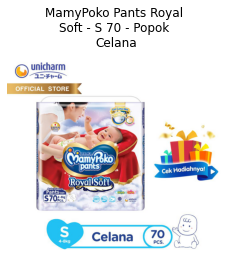

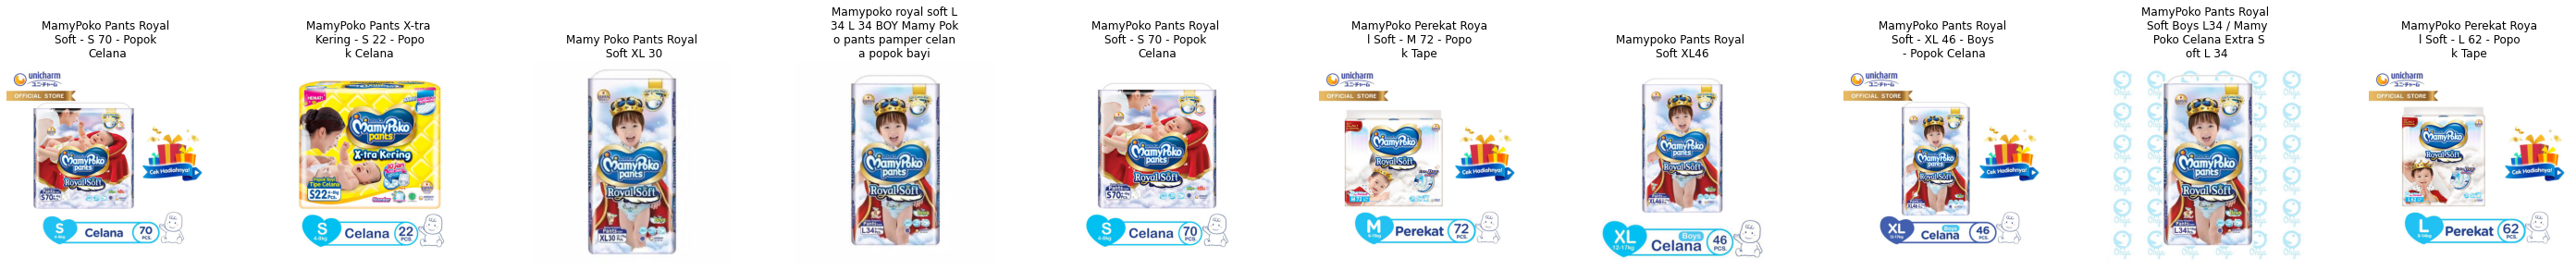

In [7]:
test_id = 'train_769054909'
subset = df.query(f'posting_id == "{test_id}"')[['filepath', 'title']]
tuples = tuple(subset.to_numpy()[0])
show_image(tuples)

tmp = pd.DataFrame(df.query(f'posting_id == "{test_id}"')['text_pred'].item(), columns=['posting_id'])
tmp = tmp.merge(df[['posting_id', 'filepath', 'title']], how='left', on='posting_id')
tuples = [tuple(i) for i in tmp[['filepath', 'title']].to_numpy()]

show_images_horizontally(tuples)

In [8]:
# df[['posting_id', 'text_pred', 'f1_score']].to_feather(path / 'text_pred.ftr')